In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting._matplotlib.style import get_standard_colors

In [7]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [8]:
df.shape

(150395, 67)

In [9]:
mortality = pd.read_csv("https://raw.githubusercontent.com/Financial-Times/coronavirus-excess-mortality-data/main/data/ft_excess_deaths.csv")
mortality.head()

,country,region,period,year,month,week,date,deaths,expected_deaths,excess_deaths,total_excess_deaths_pct
0,Albania,Albania,month,2015,1.0,NaN,2015-01-31,2490.0,NaN,NaN,42.547724
1,Albania,Albania,month,2015,2.0,NaN,2015-02-28,2139.0,NaN,NaN,42.547724
2,Albania,Albania,month,2015,3.0,NaN,2015-03-31,2051.0,NaN,NaN,42.547724
3,Albania,Albania,month,2015,4.0,NaN,2015-04-30,1906.0,NaN,NaN,42.547724
4,Albania,Albania,month,2015,5.0,NaN,2015-05-31,1709.0,NaN,NaN,42.547724


In [33]:
owid_mortality = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/excess_mortality/excess_mortality.csv")
owid_mortality.head()

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,cum_proj_deaths_all_ages,cum_p_proj_all_ages,p_proj_all_ages,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,cum_excess_per_million_proj_all_ages,excess_per_million_proj_all_ages
0,Albania,2020-01-31,-10.65,NaN,NaN,NaN,NaN,2187.0,2447.8,2490.0,...,2434.2,-10.16,-10.16,NaN,NaN,NaN,NaN,NaN,-86.044441,-86.044441
1,Albania,2020-02-29,2.17,NaN,NaN,NaN,NaN,2018.0,1975.2,2139.0,...,4395.8,-4.34,2.88,NaN,NaN,NaN,NaN,NaN,-66.412942,19.631499
2,Albania,2020-03-31,0.62,NaN,NaN,NaN,NaN,1993.0,1980.8,2051.0,...,6363.0,-2.59,1.31,NaN,NaN,NaN,NaN,NaN,-57.432576,8.980366
3,Albania,2020-04-30,3.23,NaN,NaN,NaN,NaN,1804.0,1747.6,1906.0,...,8097.0,-1.17,4.04,NaN,NaN,NaN,NaN,NaN,-33.067241,24.365335
4,Albania,2020-05-31,6.15,NaN,NaN,NaN,NaN,1803.0,1698.6,1709.0,...,9782.0,0.24,7.00,NaN,NaN,NaN,NaN,NaN,8.005753,41.072994


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# Print all countries
countries = df.location.unique()
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

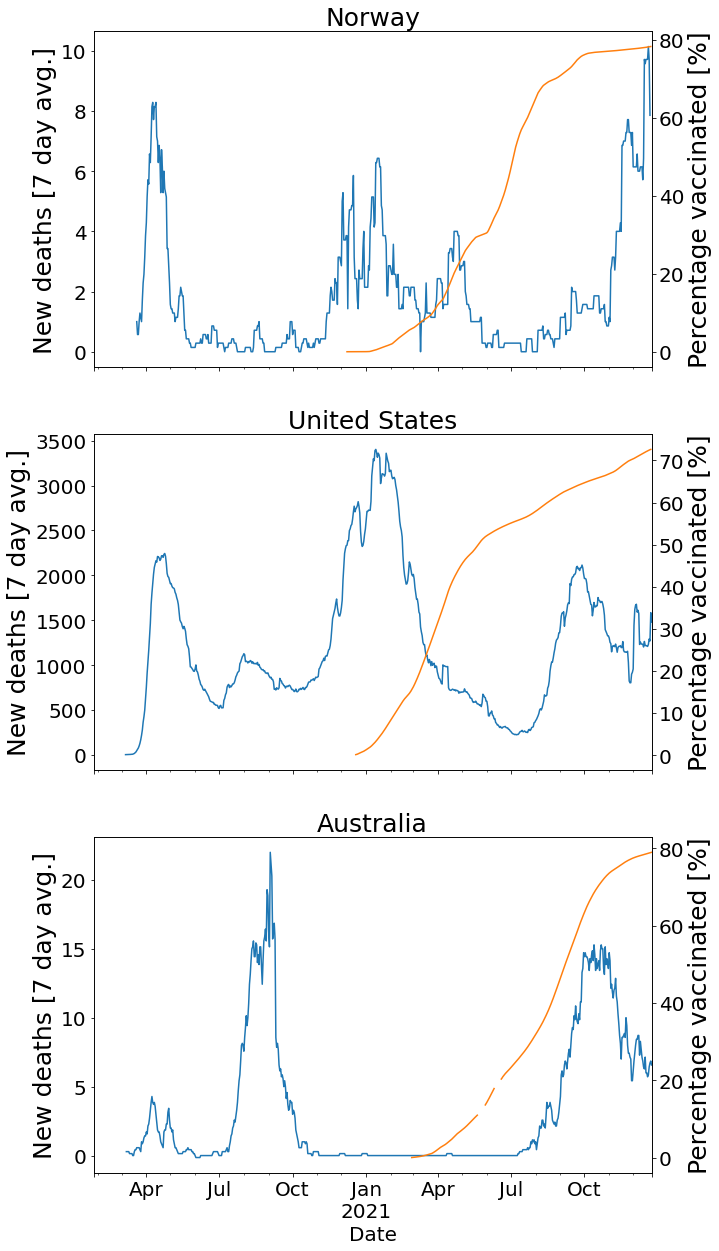

In [72]:

fig, axs = plt.subplots(3, 1, figsize=(10,21), sharex=True)
def plot1(country, ax1):
    colors = get_standard_colors(num_colors=2)
    label_size = 25
    country_data = df[df.location == country]
    country_data.index = pd.to_datetime(country_data.date)

    country_data["new_deaths"].rolling(7).mean().plot(ax=ax1, color=colors[0])
    ax1.set_ylabel(ylabel="New deaths [7 day avg.]", fontsize=label_size)
    lines, labels = ax1.get_legend_handles_labels()
    ax2 = ax1.twinx()
    ax2.spines['right'].set_position(('axes', 1.0))
    country_data["people_vaccinated_per_hundred"].rolling(7).mean().plot(ax=ax2, color=colors[1])
    ax2.set_ylabel(ylabel="Percentage vaccinated [%]" if i == 1 else "", fontsize=label_size)
    ax1.set_xlabel("Date", fontsize=20)
    lines2, labels2 = ax2.get_legend_handles_labels()

    plt.title(country, fontsize=25)
    ax1.tick_params(labelsize=20)
    ax2.tick_params(labelsize=20)

plot1("Norway", axs[0])
plot1("United States", axs[1])
plot1("Australia", axs[2])

In [35]:
owid_mortality.location.unique()

array(['Albania', 'Andorra', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England & Wales', 'Estonia', 'Faeroe Islands',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'Georgia', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guadeloupe', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
       'Malaysia', 'Maldives', 'Malta', 'Martinique', 'Mauritius',
       'Mayotte', 'Mexico', 'Mold

In [57]:
country = "Australia"
country_mortality = "US"
colors = get_standard_colors(num_colors=2)
label_size = 25
country_data = df[df.location == country]
country_data.index = pd.to_datetime(country_data.date)
country_mortality = mortality[mortality.country == country_mortality]
all_deaths = country_mortality[["date", "deaths"]].groupby("date").sum()

all_deaths.index = pd.to_datetime(all_deaths.index)
all_deaths.tail()

,deaths
date,
2021-05-08,114916.0
2021-05-15,113458.0
2021-05-22,113071.0
2021-05-29,109364.0
2021-06-05,106523.0


In [58]:
country_owid_mortality = owid_mortality[owid_mortality.location == country]
country_owid_mortality.index = pd.to_datetime(country_owid_mortality.date)
country_owid_mortality["2021-06"].tail()

<ipython-input-58-562a020a6e67>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  country_owid_mortality["2021-06"].tail()


,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,cum_proj_deaths_all_ages,cum_p_proj_all_ages,p_proj_all_ages,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,cum_excess_per_million_proj_all_ages,excess_per_million_proj_all_ages
date,,,,,,,,,,,,,,,,,,,,,
2021-06-06,Australia,2021-06-06,4.00,-2.23,4.08,1.48,7.36,NaN,NaN,NaN,...,205479.6,-0.58,1.01,-7.40,-1.93,-2.07,-1.06,4.20,-46.517369,1.140056
2021-06-13,Australia,2021-06-13,8.94,1.42,4.74,15.40,8.95,NaN,NaN,NaN,...,208431.6,-0.49,5.86,-16.68,1.74,-1.24,12.49,5.80,-39.808879,6.708490
2021-06-20,Australia,2021-06-20,7.53,-4.26,7.82,10.13,9.20,NaN,NaN,NaN,...,211341.2,-0.42,4.45,-10.38,-3.93,1.49,7.38,6.00,-34.791083,5.017796
2021-06-27,Australia,2021-06-27,4.45,1.52,-0.13,2.31,8.26,NaN,NaN,NaN,...,214282.4,-0.40,1.49,-4.44,1.86,-5.82,-0.23,5.12,-33.092633,1.698450


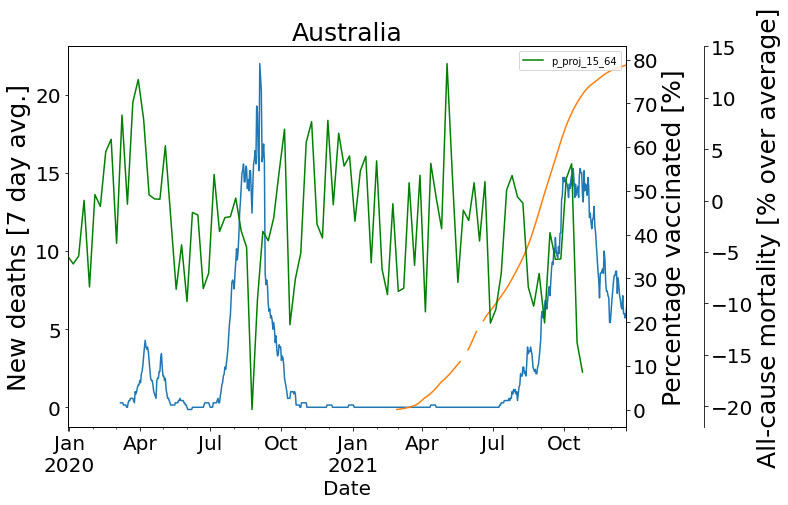

In [59]:
fig = plt.figure(figsize=(10,7))
ax1 = plt.gca()
avg_7_day_deaths = country_data["new_deaths"].rolling(7).mean()
avg_7_day_deaths.plot(ax=ax1, color=colors[0])
ax1.set_ylabel(ylabel="New deaths [7 day avg.]", fontsize=label_size)
lines, labels = ax1.get_legend_handles_labels()
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
country_data["people_vaccinated_per_hundred"].rolling(7).mean().plot(ax=ax2, color=colors[1])
ax2.set_ylabel(ylabel="Percentage vaccinated [%]", fontsize=label_size)
ax1.set_xlabel("Date", fontsize=20)
lines2, labels2 = ax2.get_legend_handles_labels()

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.14))
country_owid_mortality[["date", "p_proj_15_64"]].plot(ax=ax3, color="green", label="Exceedence %")
ax3.set_ylabel(ylabel="All-cause mortality [% over average]", fontsize=label_size)
plt.legend()
# ax4 = ax1.twinx()
# ax4.spines['right'].set_position(('axes', 1.1))
# ax4.plot(all_deaths / np.max(all_deaths) * np.max(avg_7_day_deaths), color="pink")

plt.title(country, fontsize=25)
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)